# Trabalho 1
Matéria: Processamento de Linguagem Natural <br>
Dupla/Matrícula: Bianca Nunes Coelho - 15102880, Raíssa Nunes Coelho - 15102887 <br> 

## Introdução

Multi Class Classification <br>

## Bibliotecas
Bibliotecas do ptyhon utilizadas neste trabalho estão a seguir.

In [110]:
import pandas as pd
import re
import nltk
import spacy
import gensim
import matplotlib.pyplot as plt

## Datasets
Datasets utilizados estão definidos a seguir.

In [111]:
file = "train-00000-of-00001-ecf072e7202447d8.parquet"
df = pd.read_parquet(file, engine= 'pyarrow')

In [112]:
len(df)

3877

In [113]:
df.head(4)

,titulo,texto,link,resumo,categoria,data_hora
0,"Veja a trajetória de Fernando Diniz, em busca ...",Se tem um treinador que sempre foi badalado pe...,https://www.cnnbrasil.com.br/esportes/veja-a-t...,Técnico tricolor e da Seleção Brasileira tem a...,esportes,2023-11-04 12:26:18
1,"Após tempestade com ventos, São Paulo terá sáb...",Após uma tempestade com ventos de mais de 100 ...,https://www.cnnbrasil.com.br/nacional/apos-tem...,"Termômetros devem chegar a 26ºC, esquentando a...",nacional,2023-11-04 12:15:44
2,Como os aplicativos de relacionamento “arruina...,Jenny Nguyen-Don estava com vontade de comer f...,https://www.cnnbrasil.com.br/tecnologia/como-o...,Pessoas em busca de relacionamentos afirmam qu...,tecnologia,2023-11-04 12:15:07
3,Fluminense pode ser o 26º clube a levantar a t...,O Fluminense vai em busca do primeiro título d...,https://www.cnnbrasil.com.br/esportes/fluminen...,"Em busca do título inédito, o Tricolor carioca...",esportes,2023-11-04 12:05:24


## Balanceamento

In [114]:
df['categoria'].value_counts()

esportes           960
nacional           623
internacional      618
economia           562
politica           507
entretenimento     450
tecnologia          44
saude               41
noticias            38
lifestyle           21
branded-content     13
Name: categoria, dtype: int64

<AxesSubplot: >

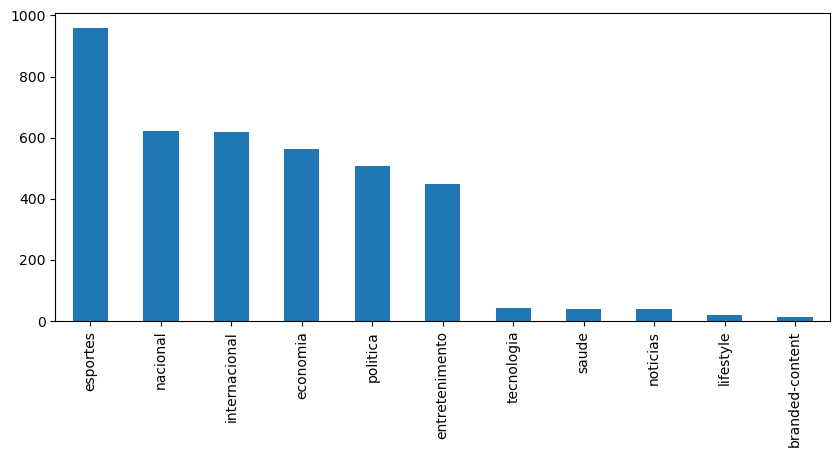

In [115]:
plt.figure(figsize=(10,4))
df.categoria.value_counts().plot(kind='bar')

In [116]:
indice_linha_remover = ['tecnologia',  'saude','noticias','lifestyle','branded-content']

In [117]:
df = df[~df['categoria'].isin(indice_linha_remover)]

In [118]:
df['categoria'].value_counts()

esportes          960
nacional          623
internacional     618
economia          562
politica          507
entretenimento    450
Name: categoria, dtype: int64

In [119]:
# Undersampling
min = df['categoria'].value_counts().min()

amostras = []

for i in df['categoria'].value_counts().index:
    a = df[df['categoria'] == i].sample(min, replace=False)
    amostras.append(a)

df_balanceado = pd.concat(amostras)

In [120]:
df_balanceado['categoria'].value_counts()

esportes          450
nacional          450
internacional     450
economia          450
politica          450
entretenimento    450
Name: categoria, dtype: int64

In [121]:
df_balanceado = df_balanceado.reset_index(drop=True)
df_balanceado.head(5)

,titulo,texto,link,resumo,categoria,data_hora
0,Alemanha derrota Argentina nos pênaltis e está...,"Em uma partida com emoção do começo ao fim, a ...",https://www.cnnbrasil.com.br/esportes/alemanha...,"Após partida emocionante no tempo normal, alem...",esportes,2023-11-28 10:49:53
1,Haaland entra para o top 20 de maiores artilhe...,Com os dois gols marcados na vitória do Manche...,https://www.cnnbrasil.com.br/esportes/haaland-...,Atacante norueguês chegou a 39 gols em 34 part...,esportes,2023-11-08 12:00:08
2,CBF admite erro em pênalti não marcado ao Cori...,"Wilson Luiz Seneme, presidente da Comissão de ...",https://www.cnnbrasil.com.br/esportes/cbf-admi...,"Wilson Luiz Seneme, presidente da comissão de ...",esportes,2023-11-14 20:15:13
3,Veja sequência de jogos do Vasco pelo Campeona...,O torcedor vascaíno respirou aliviado depois d...,https://www.cnnbrasil.com.br/esportes/veja-seq...,Equipe de Ramón Díaz tem confronto direto na l...,esportes,2023-11-07 14:40:29
4,Shakhtar Donetsk x Barcelona ao vivo: acompanh...,Leia Mais,https://www.cnnbrasil.com.br/esportes/shakhtar...,Onde assistir e tempo real dos lances e das es...,esportes,2023-11-07 07:00:21


In [122]:
df_balanceado2 = df_balanceado.copy()
df_balanceado3 = df_balanceado.copy()

In [123]:
df_balanceado2.head()

,titulo,texto,link,resumo,categoria,data_hora
0,Alemanha derrota Argentina nos pênaltis e está...,"Em uma partida com emoção do começo ao fim, a ...",https://www.cnnbrasil.com.br/esportes/alemanha...,"Após partida emocionante no tempo normal, alem...",esportes,2023-11-28 10:49:53
1,Haaland entra para o top 20 de maiores artilhe...,Com os dois gols marcados na vitória do Manche...,https://www.cnnbrasil.com.br/esportes/haaland-...,Atacante norueguês chegou a 39 gols em 34 part...,esportes,2023-11-08 12:00:08
2,CBF admite erro em pênalti não marcado ao Cori...,"Wilson Luiz Seneme, presidente da Comissão de ...",https://www.cnnbrasil.com.br/esportes/cbf-admi...,"Wilson Luiz Seneme, presidente da comissão de ...",esportes,2023-11-14 20:15:13
3,Veja sequência de jogos do Vasco pelo Campeona...,O torcedor vascaíno respirou aliviado depois d...,https://www.cnnbrasil.com.br/esportes/veja-seq...,Equipe de Ramón Díaz tem confronto direto na l...,esportes,2023-11-07 14:40:29
4,Shakhtar Donetsk x Barcelona ao vivo: acompanh...,Leia Mais,https://www.cnnbrasil.com.br/esportes/shakhtar...,Onde assistir e tempo real dos lances e das es...,esportes,2023-11-07 07:00:21


In [124]:
df_balanceado3.head()

,titulo,texto,link,resumo,categoria,data_hora
0,Alemanha derrota Argentina nos pênaltis e está...,"Em uma partida com emoção do começo ao fim, a ...",https://www.cnnbrasil.com.br/esportes/alemanha...,"Após partida emocionante no tempo normal, alem...",esportes,2023-11-28 10:49:53
1,Haaland entra para o top 20 de maiores artilhe...,Com os dois gols marcados na vitória do Manche...,https://www.cnnbrasil.com.br/esportes/haaland-...,Atacante norueguês chegou a 39 gols em 34 part...,esportes,2023-11-08 12:00:08
2,CBF admite erro em pênalti não marcado ao Cori...,"Wilson Luiz Seneme, presidente da Comissão de ...",https://www.cnnbrasil.com.br/esportes/cbf-admi...,"Wilson Luiz Seneme, presidente da comissão de ...",esportes,2023-11-14 20:15:13
3,Veja sequência de jogos do Vasco pelo Campeona...,O torcedor vascaíno respirou aliviado depois d...,https://www.cnnbrasil.com.br/esportes/veja-seq...,Equipe de Ramón Díaz tem confronto direto na l...,esportes,2023-11-07 14:40:29
4,Shakhtar Donetsk x Barcelona ao vivo: acompanh...,Leia Mais,https://www.cnnbrasil.com.br/esportes/shakhtar...,Onde assistir e tempo real dos lances e das es...,esportes,2023-11-07 07:00:21


In [125]:
# pega coluna
text = df_balanceado['texto'] # para NLTK
text2 = df_balanceado2['texto'] # para spaCy
text3 = df_balanceado3['texto'] # para Gensim
len(text)

2700

In [126]:
text[0]

'Em uma partida com emoção do começo ao fim, a Alemanha venceu a Argentina nos pênaltis e se classificou para a grande decisão da Copa do Mundo Sub-17. No tempo normal, a Seleção Alemã chegou a estar próxima da vitória, vencia por 3 a 2, mas Agustín Ruberto marcou nos acréscimos seu terceiro gol na partida e deu uma esperança aos argentinos. Nas cobranças de pênaltis, os alemães foram mais efetivos e venceram por 4 a 2.   A Seleção Argentina chegou com moral após atropelar o Brasil nas quartas de final. Mesmo assim a Alemanha não se intimidou e foi pra cima logo no começo da partida. Aos nove minutos, Paris Brunner abriu o placar em chute que contou com a colaboração do goleiro Florentín. Os argentinos não se abalaram com o gol e empilharam boas chances no primeiro tempo. Os alemães não aguentaram a pressão e levaram a virada ainda na primeira etapa. Aos 36, Agustín Ruberto, atacante do River Plate, completou cruzamento de Gorosito e empatou. Nos acréscimos da etapa inicial, Ruberto ap

In [127]:
categorias = ['esportes','nacional', 'internacional', 'economia', 'politica', 'entretenimento']

## Pré-processamento

### NLTK

In [128]:
for i in range(len(text)):
    text[i] = text[i].lower()

In [129]:
from unidecode import unidecode

for i in range(len(text)):
    text[i] = unidecode(text[i])

In [130]:
for i in range(len(text)):
    text[i] = re.sub(r'[^a-zA-Z\s]', "" ,text[i])

In [131]:
print(text[0])

em uma partida com emocao do comeco ao fim a alemanha venceu a argentina nos penaltis e se classificou para a grande decisao da copa do mundo sub no tempo normal a selecao alema chegou a estar proxima da vitoria vencia por  a  mas agustin ruberto marcou nos acrescimos seu terceiro gol na partida e deu uma esperanca aos argentinos nas cobrancas de penaltis os alemaes foram mais efetivos e venceram por  a    a selecao argentina chegou com moral apos atropelar o brasil nas quartas de final mesmo assim a alemanha nao se intimidou e foi pra cima logo no comeco da partida aos nove minutos paris brunner abriu o placar em chute que contou com a colaboracao do goleiro florentin os argentinos nao se abalaram com o gol e empilharam boas chances no primeiro tempo os alemaes nao aguentaram a pressao e levaram a virada ainda na primeira etapa aos  agustin ruberto atacante do river plate completou cruzamento de gorosito e empatou nos acrescimos da etapa inicial ruberto apareceu novamente para limpar 

In [132]:
token_text = []

for j in text:
    token_text.append(nltk.word_tokenize(j))

In [133]:
print(token_text[0])

['em', 'uma', 'partida', 'com', 'emocao', 'do', 'comeco', 'ao', 'fim', 'a', 'alemanha', 'venceu', 'a', 'argentina', 'nos', 'penaltis', 'e', 'se', 'classificou', 'para', 'a', 'grande', 'decisao', 'da', 'copa', 'do', 'mundo', 'sub', 'no', 'tempo', 'normal', 'a', 'selecao', 'alema', 'chegou', 'a', 'estar', 'proxima', 'da', 'vitoria', 'vencia', 'por', 'a', 'mas', 'agustin', 'ruberto', 'marcou', 'nos', 'acrescimos', 'seu', 'terceiro', 'gol', 'na', 'partida', 'e', 'deu', 'uma', 'esperanca', 'aos', 'argentinos', 'nas', 'cobrancas', 'de', 'penaltis', 'os', 'alemaes', 'foram', 'mais', 'efetivos', 'e', 'venceram', 'por', 'a', 'a', 'selecao', 'argentina', 'chegou', 'com', 'moral', 'apos', 'atropelar', 'o', 'brasil', 'nas', 'quartas', 'de', 'final', 'mesmo', 'assim', 'a', 'alemanha', 'nao', 'se', 'intimidou', 'e', 'foi', 'pra', 'cima', 'logo', 'no', 'comeco', 'da', 'partida', 'aos', 'nove', 'minutos', 'paris', 'brunner', 'abriu', 'o', 'placar', 'em', 'chute', 'que', 'contou', 'com', 'a', 'colabora

In [134]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /home/hworld/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [135]:
from nltk.corpus import stopwords
sw = stopwords.words('portuguese')

In [136]:
for stop in sw:
    for text in token_text:
        for t in text:
            if(t == stop):
                text.remove(t)

In [137]:
print(token_text[0])

['partida', 'emocao', 'comeco', 'fim', 'alemanha', 'venceu', 'argentina', 'penaltis', 'classificou', 'grande', 'decisao', 'copa', 'mundo', 'sub', 'tempo', 'normal', 'selecao', 'alema', 'chegou', 'proxima', 'vitoria', 'vencia', 'agustin', 'ruberto', 'marcou', 'acrescimos', 'terceiro', 'gol', 'partida', 'deu', 'esperanca', 'argentinos', 'cobrancas', 'penaltis', 'alemaes', 'efetivos', 'venceram', 'selecao', 'argentina', 'chegou', 'moral', 'apos', 'atropelar', 'brasil', 'quartas', 'final', 'assim', 'alemanha', 'nao', 'intimidou', 'pra', 'cima', 'logo', 'comeco', 'partida', 'nove', 'minutos', 'paris', 'brunner', 'abriu', 'placar', 'chute', 'contou', 'colaboracao', 'goleiro', 'florentin', 'argentinos', 'nao', 'abalaram', 'gol', 'empilharam', 'boas', 'chances', 'primeiro', 'tempo', 'alemaes', 'nao', 'aguentaram', 'pressao', 'levaram', 'virada', 'ainda', 'primeira', 'etapa', 'agustin', 'ruberto', 'atacante', 'river', 'plate', 'completou', 'cruzamento', 'gorosito', 'empatou', 'acrescimos', 'eta

In [138]:
df_balanceado['texto'] = token_text
df_balanceado.head(2)

,titulo,texto,link,resumo,categoria,data_hora
0,Alemanha derrota Argentina nos pênaltis e está...,"[partida, emocao, comeco, fim, alemanha, vence...",https://www.cnnbrasil.com.br/esportes/alemanha...,"Após partida emocionante no tempo normal, alem...",esportes,2023-11-28 10:49:53
1,Haaland entra para o top 20 de maiores artilhe...,"[dois, gols, marcados, vitoria, manchester, ci...",https://www.cnnbrasil.com.br/esportes/haaland-...,Atacante norueguês chegou a 39 gols em 34 part...,esportes,2023-11-08 12:00:08


### spaCy

In [139]:
for i in range(len(text2)):
    text2[i] = text2[i].lower()

In [140]:
from unidecode import unidecode

for i in range(len(text2)):
    text2[i] = unidecode(text2[i])

In [148]:
for i in range(len(text2)):
   text2[i] = re.sub(r'[^a-zA-Z\s]', "" ,text2[i])

In [149]:
print(text2[0])

em uma partida com emocao do comeco ao fim a alemanha venceu a argentina nos penaltis e se classificou para a grande decisao da copa do mundo sub no tempo normal a selecao alema chegou a estar proxima da vitoria vencia por  a  mas agustin ruberto marcou nos acrescimos seu terceiro gol na partida e deu uma esperanca aos argentinos nas cobrancas de penaltis os alemaes foram mais efetivos e venceram por  a    a selecao argentina chegou com moral apos atropelar o brasil nas quartas de final mesmo assim a alemanha nao se intimidou e foi pra cima logo no comeco da partida aos nove minutos paris brunner abriu o placar em chute que contou com a colaboracao do goleiro florentin os argentinos nao se abalaram com o gol e empilharam boas chances no primeiro tempo os alemaes nao aguentaram a pressao e levaram a virada ainda na primeira etapa aos  agustin ruberto atacante do river plate completou cruzamento de gorosito e empatou nos acrescimos da etapa inicial ruberto apareceu novamente para limpar 

In [151]:
nlp = spacy.load('pt_core_news_sm')

doc = []

for j in text2:
    temp = nlp(j)
    doc.append(temp)
print(doc[0])

em uma partida com emocao do comeco ao fim a alemanha venceu a argentina nos penaltis e se classificou para a grande decisao da copa do mundo sub no tempo normal a selecao alema chegou a estar proxima da vitoria vencia por  a  mas agustin ruberto marcou nos acrescimos seu terceiro gol na partida e deu uma esperanca aos argentinos nas cobrancas de penaltis os alemaes foram mais efetivos e venceram por  a    a selecao argentina chegou com moral apos atropelar o brasil nas quartas de final mesmo assim a alemanha nao se intimidou e foi pra cima logo no comeco da partida aos nove minutos paris brunner abriu o placar em chute que contou com a colaboracao do goleiro florentin os argentinos nao se abalaram com o gol e empilharam boas chances no primeiro tempo os alemaes nao aguentaram a pressao e levaram a virada ainda na primeira etapa aos  agustin ruberto atacante do river plate completou cruzamento de gorosito e empatou nos acrescimos da etapa inicial ruberto apareceu novamente para limpar 

In [164]:
token_text2 = []

#Creating and updating our list of tokens using list comprehension 
for i in range(len(text2)):
    temp = [token.text for token in doc[i]]
    token_text2.append(temp)

print(token_text2[0])

['em', 'uma', 'partida', 'com', 'emocao', 'do', 'comeco', 'ao', 'fim', 'a', 'alemanha', 'venceu', 'a', 'argentina', 'nos', 'penaltis', 'e', 'se', 'classificou', 'para', 'a', 'grande', 'decisao', 'da', 'copa', 'do', 'mundo', 'sub', 'no', 'tempo', 'normal', 'a', 'selecao', 'alema', 'chegou', 'a', 'estar', 'proxima', 'da', 'vitoria', 'vencia', 'por', ' ', 'a', ' ', 'mas', 'agustin', 'ruberto', 'marcou', 'nos', 'acrescimos', 'seu', 'terceiro', 'gol', 'na', 'partida', 'e', 'deu', 'uma', 'esperanca', 'aos', 'argentinos', 'nas', 'cobrancas', 'de', 'penaltis', 'os', 'alemaes', 'foram', 'mais', 'efetivos', 'e', 'venceram', 'por', ' ', 'a', '   ', 'a', 'selecao', 'argentina', 'chegou', 'com', 'moral', 'apos', 'atropelar', 'o', 'brasil', 'nas', 'quartas', 'de', 'final', 'mesmo', 'assim', 'a', 'alemanha', 'nao', 'se', 'intimidou', 'e', 'foi', 'pra', 'cima', 'logo', 'no', 'comeco', 'da', 'partida', 'aos', 'nove', 'minutos', 'paris', 'brunner', 'abriu', 'o', 'placar', 'em', 'chute', 'que', 'contou',

In [165]:
from spacy.lang.pt.stop_words import STOP_WORDS
stop = STOP_WORDS
print(stop)

{'vens', 'vinda', 'adeus', 'iniciar', 'porque', 'aquele', 'sou', 'diz', 'porquê', 'assim', 'tive', 'possível', 'tivemos', 'têm', 'podia', 'é', 'muitos', 'pelo', 'dar', 'você', 'outros', 'essas', 'estiveste', 'através', 'catorze', 'vossas', 'dezoito', 'estará', 'quinto', 'quieto', 'alguns', 'daquela', 'menos', 'ora', 'tivestes', 'sexta', 'vêm', 'vai', 'aí', 'usa', 'quatro', 'que', 'novos', 'nunca', 'querem', 'sois', 'área', 'algo', 'seis', 'tal', 'sexto', 'possivelmente', 'és', 'des', 'diante', 'momento', 'longe', 'aqui', 'tiveste', 'direita', 'mês', 'sobre', 'oitavo', 'uns', 'mil', 'menor', 'maioria', 'fará', 'quarto', 'porquanto', 'vosso', 'seria', 'fez', 'de', 'aqueles', 'sistema', 'ademais', 'fui', 'bem', 'um', 'nada', 'saber', 'cujo', 'dentro', 'forma', 'tudo', 'estiveram', 'nós', 'põem', 'dessa', 'pegar', 'pois', 'toda', 'aos', 'dá', 'tentar', 'breve', 'último', 'meu', 'elas', 'talvez', 'oito', 'poder', 'quem', 'enquanto', 'tem', 'ver', 'dizem', 'próximo', 'nuns', 'quer', 'comprid

In [166]:
token2 = []
for i in token_text2:
    temp = []
    for token in i:
        if token not in stop:
            temp.append(token)
    token2.append(temp)
print(token2[0])

['partida', 'emocao', 'comeco', 'alemanha', 'venceu', 'argentina', 'penaltis', 'classificou', 'decisao', 'copa', 'mundo', 'sub', 'normal', 'selecao', 'alema', 'chegou', 'proxima', 'vitoria', 'vencia', ' ', ' ', 'agustin', 'ruberto', 'marcou', 'acrescimos', 'gol', 'partida', 'deu', 'esperanca', 'argentinos', 'cobrancas', 'penaltis', 'alemaes', 'efetivos', 'venceram', ' ', '   ', 'selecao', 'argentina', 'chegou', 'moral', 'apos', 'atropelar', 'brasil', 'quartas', 'alemanha', 'nao', 'intimidou', 'pra', 'comeco', 'partida', 'minutos', 'paris', 'brunner', 'abriu', 'placar', 'chute', 'contou', 'colaboracao', 'goleiro', 'florentin', 'argentinos', 'nao', 'abalaram', 'gol', 'empilharam', 'boas', 'chances', 'alemaes', 'nao', 'aguentaram', 'pressao', 'levaram', 'virada', 'etapa', ' ', 'agustin', 'ruberto', 'atacante', 'river', 'plate', 'completou', 'cruzamento', 'gorosito', 'empatou', 'acrescimos', 'etapa', 'inicial', 'ruberto', 'apareceu', 'novamente', 'limpar', 'marcacao', 'gol', 'virada', 'arg

In [167]:
df_balanceado2['texto'] = token2
df_balanceado2.head(2)

,titulo,texto,link,resumo,categoria,data_hora
0,Alemanha derrota Argentina nos pênaltis e está...,"[partida, emocao, comeco, alemanha, venceu, ar...",https://www.cnnbrasil.com.br/esportes/alemanha...,"Após partida emocionante no tempo normal, alem...",esportes,2023-11-28 10:49:53
1,Haaland entra para o top 20 de maiores artilhe...,"[gols, marcados, vitoria, manchester, city, yo...",https://www.cnnbrasil.com.br/esportes/haaland-...,Atacante norueguês chegou a 39 gols em 34 part...,esportes,2023-11-08 12:00:08


### Gensim

In [169]:
from gensim.utils import simple_preprocess

for i in range(len(text3)):
    text3[i] = text3[i].lower()

In [170]:
from unidecode import unidecode

for i in range(len(text3)):
    text3[i] = unidecode(text3[i])

In [172]:
for i in range(len(text3)):
   text3[i] = re.sub(r'[^a-zA-Z\s]', "" ,text3[i])

In [173]:
tokens3 = []

for i in range(len(text3)):
    tokens3.append(simple_preprocess(text3[i], min_len = 4))

print(tokens3[0])

['partida', 'emocao', 'comeco', 'alemanha', 'venceu', 'argentina', 'penaltis', 'classificou', 'para', 'grande', 'decisao', 'copa', 'mundo', 'tempo', 'normal', 'selecao', 'alema', 'chegou', 'estar', 'proxima', 'vitoria', 'vencia', 'agustin', 'ruberto', 'marcou', 'acrescimos', 'terceiro', 'partida', 'esperanca', 'argentinos', 'cobrancas', 'penaltis', 'alemaes', 'foram', 'mais', 'efetivos', 'venceram', 'selecao', 'argentina', 'chegou', 'moral', 'apos', 'atropelar', 'brasil', 'quartas', 'final', 'mesmo', 'assim', 'alemanha', 'intimidou', 'cima', 'logo', 'comeco', 'partida', 'nove', 'minutos', 'paris', 'brunner', 'abriu', 'placar', 'chute', 'contou', 'colaboracao', 'goleiro', 'florentin', 'argentinos', 'abalaram', 'empilharam', 'boas', 'chances', 'primeiro', 'tempo', 'alemaes', 'aguentaram', 'pressao', 'levaram', 'virada', 'ainda', 'primeira', 'etapa', 'agustin', 'ruberto', 'atacante', 'river', 'plate', 'completou', 'cruzamento', 'gorosito', 'empatou', 'acrescimos', 'etapa', 'inicial', 'rub

## Análises

### NLTK

In [38]:
from collections import Counter  # Contagem de frequência de palavras usando NLTK 
frequencia_palavras = Counter(token_text[1]) 
print(frequencia_palavras.most_common())

[('chelsea', 4), ('clube', 4), ('jogador', 4), ('moscardo', 3), ('corinthians', 3), ('proposta', 3), ('mantem', 2), ('contratar', 2), ('ingles', 2), ('paulista', 2), ('apos', 2), ('anos', 2), ('milhoes', 2), ('timao', 2), ('firme', 1), ('ideia', 1), ('volante', 1), ('gabriel', 1), ('conversas', 1), ('equipe', 1), ('recusar', 1), ('primeira', 1), ('ultimo', 1), ('mes', 1), ('julho', 1), ('epoca', 1), ('tentou', 1), ('euros', 1), ('aproximadamente', 1), ('r', 1), ('considerando', 1), ('bonus', 1), ('metas', 1), ('atingidas', 1), ('balancou', 1), ('numeros', 1), ('apresentados', 1), ('optou', 1), ('segurar', 1), ('leia', 1), ('importante', 1), ('ressaltar', 1), ('segunda', 1), ('tentativa', 1), ('ainda', 1), ('nao', 1), ('formalizou', 1), ('oficial', 1), ('caso', 1), ('feita', 1), ('ja', 1), ('sinalizou', 1), ('estafe', 1), ('so', 1), ('dara', 1), ('andamento', 1), ('negociacoes', 1), ('dia', 1), ('novembro', 1), ('ocorrem', 1), ('eleicoes', 1), ('presidenciais', 1), ('negocio', 1), ('con

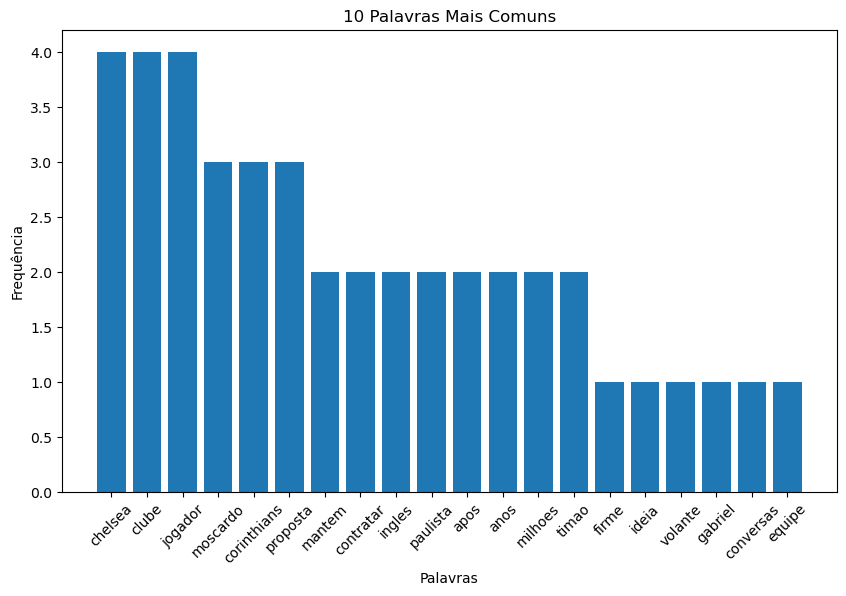

In [39]:
# Obter os 10 tokens mais comuns e suas contagens
tokens_mais_comuns = frequencia_palavras.most_common(20)
palavras, contagens = zip(*tokens_mais_comuns)

# Gráfico de Barras
plt.figure(figsize=(10, 6))
plt.bar(palavras, contagens)
plt.xlabel('Palavras')
plt.ylabel('Frequência')
plt.title('10 Palavras Mais Comuns')
plt.xticks(rotation=45)
plt.show()

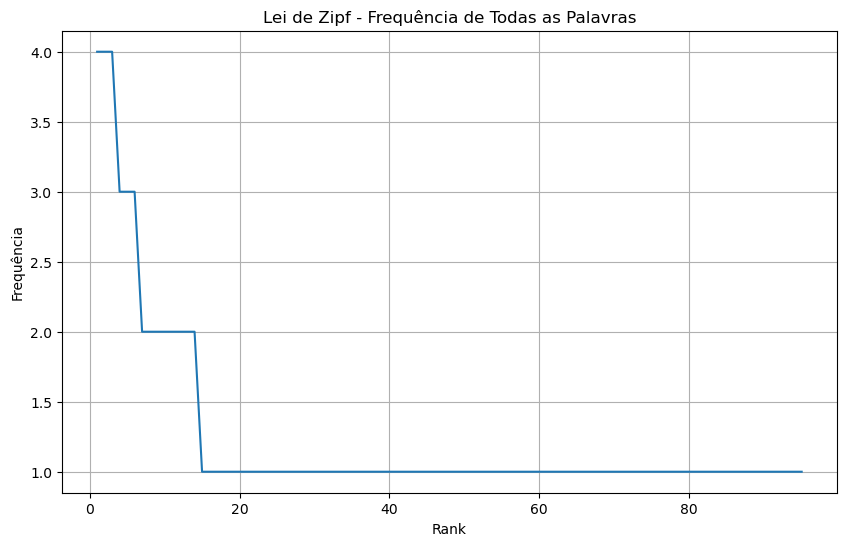

In [40]:
palavras_ordenadas = sorted(frequencia_palavras.items(), key=lambda x: x[1], reverse=True)
palavras, contagens = zip(*palavras_ordenadas)

# Plotar o gráfico da Lei de Zipf
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(palavras) + 1), contagens)
plt.xlabel('Rank')
plt.ylabel('Frequência')
plt.title('Lei de Zipf - Frequência de Todas as Palavras')
plt.grid(True)
plt.show()

## Prediction
https://github.com/susanli2016/Machine-Learning-with-Python/blob/master/Consumer_complaints.ipynb  <br>
refazer para cada biblioteca

### NLTK

In [41]:
for i in range(len(token_text)):
    token_text[i] = " ".join(token_text[i])
print(token_text[0])

In [42]:
df_balanceado['texto'] = token_text
df_balanceado.head(5)

,titulo,texto,link,resumo,categoria,data_hora
0,Ituano x Chapecoense: tempo real e onde assist...,,https://www.cnnbrasil.com.br/esportes/ituano-x...,Onde assistir e tempo real dos lances e das es...,esportes,2023-11-17 14:20:18
1,Chelsea intensifica conversas com Gabriel Mosc...,chelsea mantem firme ideia contratar volante g...,https://www.cnnbrasil.com.br/esportes/chelsea-...,Clube paulista já recusou uma proposta dos ing...,esportes,2023-11-09 14:04:55
2,Ex-jogador Fred deita no chão após assalto no ...,camera seguranca mostrou momento exjogador fut...,https://www.cnnbrasil.com.br/esportes/ex-jogad...,Imagens de câmeras de segurança mostram três c...,esportes,2023-11-24 11:50:29
3,Esposa de Daniel Alves dá entrevista polêmica ...,esposa daniel alves preso desde janeiro suspei...,https://www.cnnbrasil.com.br/esportes/esposa-d...,"Alves foi preso no dia 20 de janeiro, pouco me...",esportes,2023-11-25 20:39:52
4,Diniz faz mistério em escalação do Fluminense ...,fernando diniz nao quis saber dar pistas sobre...,https://www.cnnbrasil.com.br/esportes/diniz-fa...,Treinador lamentou episódios ocorridos na últi...,esportes,2023-11-03 21:17:20


In [43]:
col = ['categoria', 'texto']
df_balanceado = df_balanceado[col]

In [44]:
df_balanceado.head()

,categoria,texto
0,esportes,
1,esportes,chelsea mantem firme ideia contratar volante g...
2,esportes,camera seguranca mostrou momento exjogador fut...
3,esportes,esposa daniel alves preso desde janeiro suspei...
4,esportes,fernando diniz nao quis saber dar pistas sobre...


In [45]:
df_balanceado['category_id'] = df_balanceado['categoria'].factorize()[0]
from io import StringIO
category_id_df = df_balanceado[['categoria', 'category_id']].drop_duplicates().sort_values('category_id')
category_to_id = dict(category_id_df.values)
id_to_category = dict(category_id_df[['category_id', 'categoria']].values)
df_balanceado.head()

,categoria,texto,category_id
0,esportes,,0
1,esportes,chelsea mantem firme ideia contratar volante g...,0
2,esportes,camera seguranca mostrou momento exjogador fut...,0
3,esportes,esposa daniel alves preso desde janeiro suspei...,0
4,esportes,fernando diniz nao quis saber dar pistas sobre...,0


In [46]:
## Bag of Words model - TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words=sw)
features = tfidf.fit_transform(df_balanceado['texto']).toarray()
labels = df_balanceado.category_id
features.shape

(2700, 20210)

In [47]:
from sklearn.feature_selection import chi2
import numpy as np

N = 2

for categoria, category_id in sorted(category_to_id.items()):
  features_chi2 = chi2(features, labels == category_id)
  indices = np.argsort(features_chi2[0])
  feature_names = np.array(tfidf.get_feature_names_out())[indices]
  unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
  bigrams = [v for v in feature_names if len(v.split(' ')) == 2]
  print("# '{}':".format(categoria))
  print("  . Most correlated unigrams:\n. {}".format('\n. '.join(unigrams[-N:])))
  print("  . Most correlated bigrams:\n. {}".format('\n. '.join(bigrams[-N:])))

# 'economia':
  . Most correlated unigrams:
. mercado
. bilhoes
  . Most correlated bigrams:
. reforma tributaria
. banco central
# 'entretenimento':
  . Most correlated unigrams:
. fas
. cantora
  . Most correlated bigrams:
. post shared
. shared by
# 'esportes':
  . Most correlated unigrams:
. rodada
. campeonato
  . Most correlated bigrams:
. originalmente itatiaia
. itatiaia versao
# 'internacional':
  . Most correlated unigrams:
. gaza
. israel
  . Most correlated bigrams:
. defesa israel
. faixa gaza
# 'nacional':
  . Most correlated unigrams:
. civil
. policia
  . Most correlated bigrams:
. defesa civil
. policia civil
# 'politica':
  . Most correlated unigrams:
. supremo
. stf
  . Most correlated bigrams:
. supremo tribunal
. tribunal federal


In [48]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB

X_train, X_test, y_train, y_test = train_test_split(df_balanceado['texto'], df_balanceado['categoria'], random_state = 2)
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train)
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)

clf = MultinomialNB().fit(X_train_tfidf, y_train)

In [49]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC

from sklearn.model_selection import cross_val_score

models = [
    RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0),
    LinearSVC(),
    MultinomialNB(),
    LogisticRegression(random_state=0),
]
CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []
for model in models:
  model_name = model.__class__.__name__
  accuracies = cross_val_score(model, features, labels, scoring='accuracy', cv=CV)
  for fold_idx, accuracy in enumerate(accuracies):
    entries.append((model_name, fold_idx, accuracy))
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])

/home/hworld/.local/lib/python3.10/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/hworld/.local/lib/python3.10/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/hworld/.local/lib/python3.10/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/hworld/.local/lib/python3.10/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/hworld/.local/lib/python3.10/s

In [50]:
cv_df.groupby('model_name').accuracy.mean()

model_name
LinearSVC                 0.913704
LogisticRegression        0.898148
MultinomialNB             0.891111
RandomForestClassifier    0.791481
Name: accuracy, dtype: float64

In [51]:
from sklearn.model_selection import train_test_split

model = LinearSVC()

X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(features, labels, df_balanceado.index, test_size=0.33, random_state=0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

/home/hworld/.local/lib/python3.10/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


In [52]:
from sklearn import metrics
print(metrics.classification_report(y_test, y_pred,target_names=df_balanceado['categoria'].unique()))

                precision    recall  f1-score   support

      esportes       0.98      0.99      0.99       140
      nacional       0.88      0.86      0.87       147
 internacional       0.94      0.92      0.93       159
      economia       0.89      0.91      0.90       137
      politica       0.89      0.84      0.87       141
entretenimento       0.93      0.98      0.95       167

      accuracy                           0.92       891
     macro avg       0.92      0.92      0.92       891
  weighted avg       0.92      0.92      0.92       891

